In [9]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('mosquito_indicator.csv')
df.head()

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9


In [2]:
df.describe()

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,251.991803,3.539866,14.166021,10.005663,19.096870
std,295.871336,13.868106,10.943990,11.109489,11.063394
min,0.000000,0.000000,-14.800000,-17.800000,-10.700000
25%,5.500000,0.000000,4.500000,0.300000,9.300000
50%,91.900000,0.000000,16.500000,11.500000,21.900000
75%,480.400000,0.400000,23.300000,19.500000,28.175000
max,1000.000000,144.500000,33.700000,30.300000,39.600000


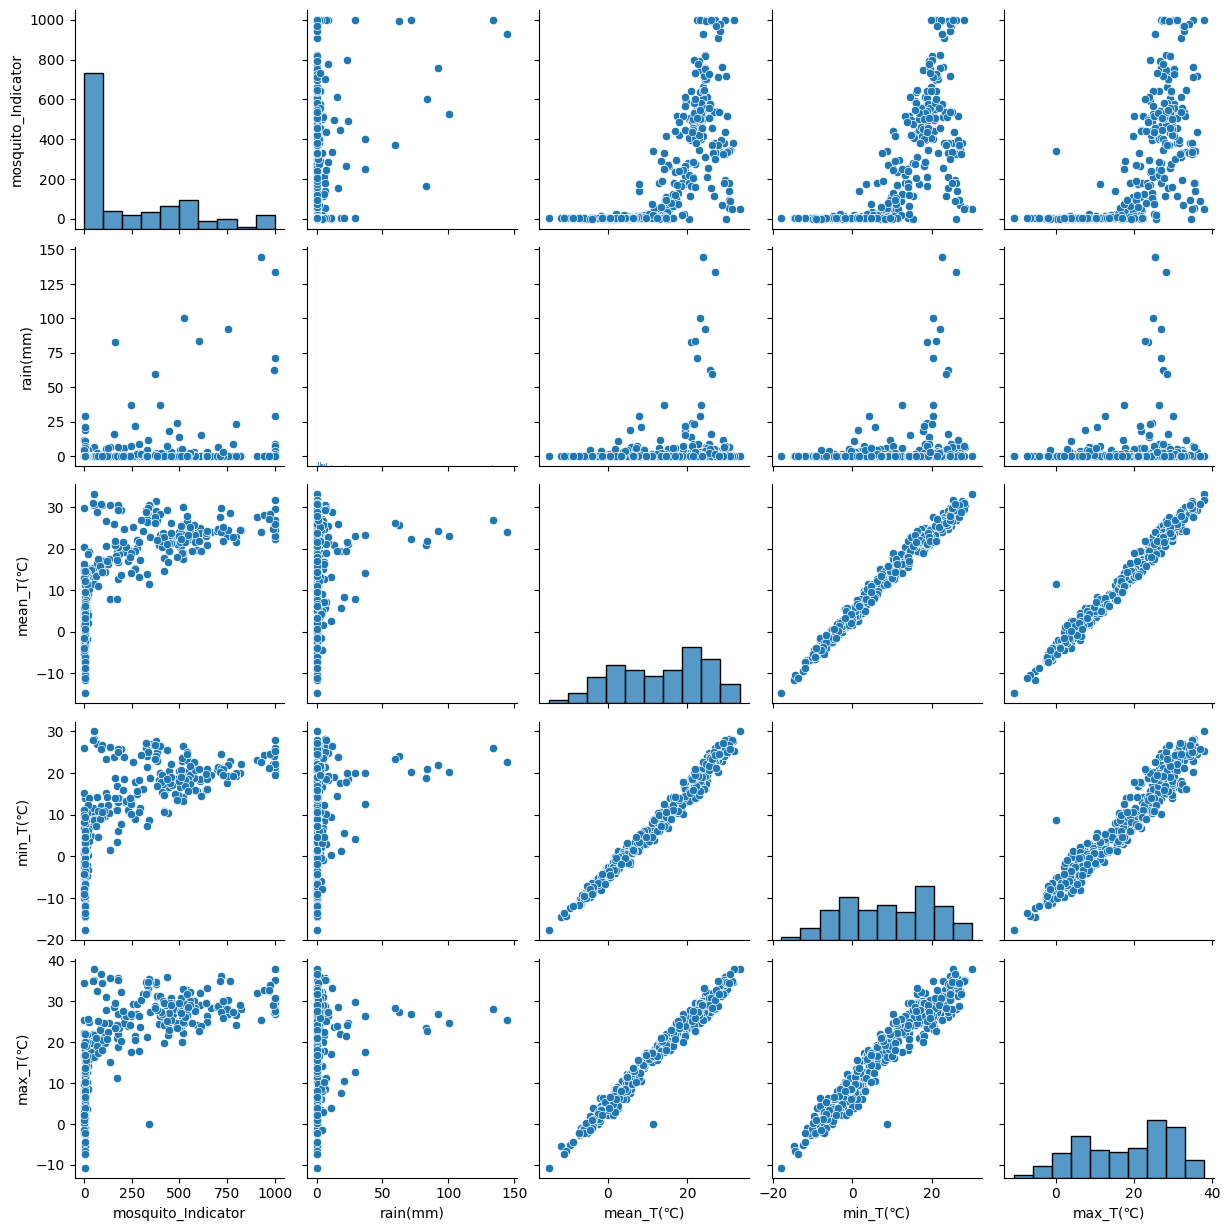

In [4]:
import seaborn as sns

sns.pairplot(df.sample(frac=0.3))

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df.values[:, 2:]
y = df.values[:, 1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

model_ols = linear_model.LinearRegression()
model_ols.fit(X_train, y_train)
mean_absolute_error(y_test, model_ols.predict(X_test))

154.43967250856923

In [18]:
model_ols.predict(np.array([20, 30, 24, 36]).reshape(1, -1))

array([533.31189491])

In [19]:
import pickle

pickle.dump(model_ols, open('model.pkl', 'wb'))
model_ols = pickle.load(open('model.pkl', 'rb'))
mean_absolute_error(y_test, model_ols.predict(X_test))

154.43967250856923

In [20]:
model_ols.predict(np.array([20, 30, 24, 36]).reshape(1, -1))

array([533.31189491])